### [예제 7_1]  1 conv / 2 FC 

#### 1 conv, 1 flatten layer, 1 hidden layer

In [1]:
# colab 에서 tensorflow 1.x 실행
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

# read_data_sets() 를 통해 데이터를 객체형태로 받아오고
# one_hot 옵션을 통해 정답(label) 을 one-hot 인코딩된 형태로 받아옴

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# mnist 데이터 셋은 train, test, validation 3개의 데이터 셋으로 구성되어 있으며.
# num_examples 값을 통해 데이터의 갯수 확인 가능함

print("\n", mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples)

# 데이터는 784(28x28)개의 픽셀을 가지는 이미지와
# 10(0~9)개 클래스를 가지는 one-hot 인코딩된 레이블(정답)을 가지고 있음

print("\ntrain image shape = ", np.shape(mnist.train.images))
print("train label shape = ", np.shape(mnist.train.labels))
print("test image shape = ", np.shape(mnist.test.images))
print("test label shape = ", np.shape(mnist.test.labels))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
# Hyper-Parameter
learning_rate = 0.001  # 학습율
epochs = 50            # 반복횟수
batch_size = 100      # 한번에 입력으로 주어지는 MNIST 개수

In [0]:
# 입력과 정답을 위한 플레이스홀더 정의
X = tf.placeholder(tf.float32, [None, 784])  

A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])   # image 28X28X1 (black/white)


T = tf.placeholder(tf.float32, [None, 10])  

In [0]:
# 1번째 컨볼루션 층, 5X5X128 필터
W2 = tf.Variable(tf.random_normal([5, 5, 1, 128], stddev=0.01))  
b2 = tf.Variable(tf.constant(0.1, shape=[128]))   

# 1번째 컨볼루션 연산을 통해 28 X 28 X1  => 28 X 28 X 128 
C2 = tf.nn.conv2d(A1, W2, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z2 = tf.nn.relu(C2+b2)

# 1번째 max pooling을 통해 28 X 28 X 128  => 14 X 14 X 128 
A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [0]:
# 완전연결층, 14X14X128개 입력 출력은 256개 의 은닉층 개념
A2_flat = P2_flat = tf.reshape(A2, [-1, 14*14*128])

W3 = tf.Variable(tf.random_normal([14*14*128, 512], stddev=0.01))
b3 = tf.Variable(tf.random_normal([512]))

Z3 = tf.matmul(A2_flat, W3) + b3

A3 = tf.nn.relu(Z3)

In [0]:
# 출력층
W4 = tf.Variable(tf.random_normal([512, 10], stddev=0.01))
b4 = tf.Variable(tf.random_normal([10]))

# 출력층 선형회귀  값 Z4, 즉 softmax 에 들어가는 입력 값
Z4 = logits = tf.matmul(A3, W4) + b4

y = A4 = tf.nn.softmax(Z4)

In [0]:
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z4, labels=T) )

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

In [0]:
# batch_size X 10 데이터에 대해 argmax를 통해 행단위로 비교함
predicted_val = tf.equal( tf.argmax(A4, 1), tf.argmax(T, 1) )

# batch_size X 10 의 True, False 를 1 또는 0 으로 변환
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

# index list 출력
accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

# 예측값 처리
predicted_list = tf.argmax(A4, 1)

In [10]:
index_label_prediction_list = []

with  tf.Session()  as sess:
    
    sess.run(tf.global_variables_initializer())  # 변수 노드(tf.Variable) 초기화
    
    start_time = datetime.now()
    
    for i in range(epochs):    # 50 번 반복수행
        
        total_batch = int(mnist.train.num_examples / batch_size)  # 55,000 / 100

        for step in range(total_batch):
            
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
      
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})    
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now() 
    
    print("\nelapsed time = ", end_time - start_time) 
    
    # Accuracy 확인
    test_x_data = mnist.test.images    # 10000 X 784
    test_t_data = mnist.test.labels    # 10000 X 10
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})
    
    print("\nAccuracy = ", accuracy_val)
    print("type(accuracy_val) = ", type(accuracy_val), ', type(predicted_list_val) = ', type(predicted_list_val), ', type(index_label) = ', type(index_label))
    print("index_label.shape = ", index_label.shape)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
        
    
    temp_list = [] 
    
    for index in range(len(index_label)):
        
        if index_label[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_prediction_list.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list", len(index_label_prediction_list))

epochs =  0 , step =  0 , loss_val =  2.9502234
epochs =  0 , step =  100 , loss_val =  0.47684997
epochs =  0 , step =  200 , loss_val =  0.1886849
epochs =  0 , step =  300 , loss_val =  0.117744744
epochs =  0 , step =  400 , loss_val =  0.10226797
epochs =  0 , step =  500 , loss_val =  0.08977124
epochs =  1 , step =  0 , loss_val =  0.10269767
epochs =  1 , step =  100 , loss_val =  0.08259914
epochs =  1 , step =  200 , loss_val =  0.06426719
epochs =  1 , step =  300 , loss_val =  0.06789464
epochs =  1 , step =  400 , loss_val =  0.06826701
epochs =  1 , step =  500 , loss_val =  0.095806025
epochs =  2 , step =  0 , loss_val =  0.04350901
epochs =  2 , step =  100 , loss_val =  0.13146435
epochs =  2 , step =  200 , loss_val =  0.045136847
epochs =  2 , step =  300 , loss_val =  0.06578821
epochs =  2 , step =  400 , loss_val =  0.028763212
epochs =  2 , step =  500 , loss_val =  0.024713181
epochs =  3 , step =  0 , loss_val =  0.014563176
epochs =  3 , step =  100 , loss_va

In [11]:
# index_label_prediction_list
print(index_label_prediction_list)

[[115, 4, 9], [247, 4, 6], [321, 2, 7], [340, 5, 3], [445, 6, 0], [448, 9, 8], [659, 2, 1], [947, 8, 9], [1014, 6, 5], [1112, 4, 6], [1128, 3, 7], [1226, 7, 2], [1232, 9, 4], [1242, 4, 9], [1247, 9, 5], [1260, 7, 1], [1319, 8, 0], [1393, 5, 3], [1527, 1, 5], [1554, 9, 8], [1621, 0, 6], [1709, 9, 8], [1790, 2, 7], [1828, 3, 7], [1878, 8, 3], [1901, 9, 8], [2118, 6, 0], [2130, 4, 9], [2135, 6, 1], [2182, 1, 3], [2293, 9, 2], [2414, 9, 4], [2447, 4, 9], [2597, 5, 3], [2654, 6, 1], [2778, 4, 0], [2896, 8, 0], [2921, 3, 8], [2927, 3, 2], [2939, 9, 5], [2953, 3, 5], [3073, 1, 2], [3503, 9, 1], [3520, 6, 4], [3534, 4, 8], [3681, 2, 3], [3727, 8, 9], [3762, 6, 8], [3808, 7, 8], [3941, 4, 2], [4176, 2, 7], [4201, 1, 7], [4360, 5, 3], [4571, 6, 8], [4740, 3, 5], [4761, 9, 8], [4823, 9, 4], [4860, 4, 9], [5201, 4, 9], [5228, 6, 4], [5634, 2, 8], [5654, 7, 2], [5749, 8, 2], [5937, 5, 3], [5955, 3, 8], [6166, 9, 3], [6173, 9, 8], [6560, 9, 5], [6597, 0, 9], [6603, 8, 7], [8094, 2, 8], [9015, 7, 2],

len of index_label_prediction_list =>  77 , false_data_index =>  26


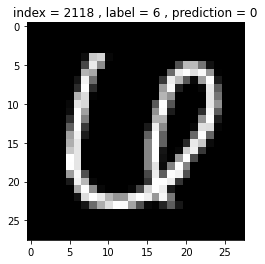

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

false_data_index = np.random.randint(len(index_label_prediction_list))

print('len of index_label_prediction_list => ', len(index_label_prediction_list), ', false_data_index => ', false_data_index)

mnist_index = index_label_prediction_list[false_data_index][0]
label = index_label_prediction_list[false_data_index][1]
prediction = index_label_prediction_list[false_data_index][2]

title_str = 'index = ' + str(mnist_index) + ' , label = ' + str(label) + ' , prediction = ' + str(prediction)

img = test_x_data[mnist_index].reshape(28,28)


plt.title(title_str)
plt.imshow(img, cmap='gray')
plt.show()